# Group 5
## Data Wrangling Final Project<br>Social Determinants of Health

__Team Members__<br>
Jonathan Himes jonathan.himes@utah.edu U1367169 <br>
Michelle Kubicki michelle.kubicki@utah.edu U1370752<br> 
Yueqin Yang yueqin.yang@hsc.utah.edu U0737683<br> 
Jackie Bearnson u0763123@umail.utah.edu U0763123 <br>
Lucia Ranallo U1427138@umail.utah.edu U1427138 <br>
___
<a id='toc'></a>
### Table of Contents
* [Table of Contents](#toc)
* [Necessary Packages](#load_pack)
* [Project Description](#proj_description)
* [Dataset Creation](#data_prep)
    * [2018 Dataset Creation](#data_prep_2018)
    * [2019 Dataset Creation](#data_prep_2019)
* [Data Exporation](#data_exp)
    * [2018 Data Exploration](#data_exp_2018)
    * [2019 Data Exploration](#data_exp_2019)
* [Data Comparison](#data_comp)
    * [Boxplots](#data_boxplot)
    * [Statistical Tests](#data_stat)

___
<a id='load_pack'></a>
### Necessary Packages

In [1]:
# Import required packages
import pandas as pd
import numpy as np
from operator import truediv
import matplotlib.pyplot as plt
from scipy import stats

___
<a id='proj_description'></a>
### Project Description

Someone explain SDOH


The following is a summary of the Utah SDOH variables chosen for and whether they were available for both 2018 and 2019.

SDOH items were chosen to be similiar to those in the article
* “FACETS: using open data to measure community social determinants of health” 
    * by Michael N Cantor, Rajan Chandras, and Claudia Pulgarin.

This paper can be found at the following link:
* https://academic.oup.com/jamia/article/25/4/419/4569610

Extensive reseach was done in aquiring the data from the data sources. Some SDOH variables chosen by the authors of the above paper were not included in this project due to:
* Variables were New York Specific
* Variables cost money to obtain
* Variables not available for designated years

In [2]:
summary = pd.read_csv('Data/SDOH_summary.csv')
summary

,Item,Description,Source,2018 Availability,2019 Availability
0,FIPS,US Census 11 digit FIPS code for tract,US Census,YES,YES
1,Urban,Urban/Rural Flag,USDA Food Access Research Atlas,NO,YES
2,Total_population,Total Population,ACS 2015 Estimates,YES,YES
3,P_WH,% White,ACS 2015 Estimates,YES,YES
4,P_AA,% African-American,ACS 2015 Estimates,YES,YES
5,P_AI,% American Indian,ACS 2015 Estimates,YES,YES
6,P_AS,% Asian,ACS 2015 Estimates,YES,YES
7,P_NH,% Native Hawaiian/Pacific Islander,ACS 2015 Estimates,YES,YES
8,P_OR,% Other Race,ACS 2015 Estimates,YES,YES
9,P_2R,% 2 or more Races,ACS 2015 Estimates,YES,YES


___
<a id='data_prep'></a>
### Dataset Creation

<a id='data_prep_2018'></a>
#### 2018 Dataset Creation

In [3]:
# Read in data
race_df = pd.read_csv('Data/C02003_Detailed Race--Data.csv',skiprows=[1])
latino_df = pd.read_csv('Data/B03002-Hispanic-Data.csv',skiprows=[1])
native_df = pd.read_csv('Data/B99051-Native-Data.csv',index_col=0)
citizen_df = pd.read_csv('Data/B05002-Citizenship-Data.csv',index_col=0)
education_df = pd.read_csv('Data/S1501-Education-Data.csv',index_col=0)
english_df = pd.read_csv('Data/C16001-Language-Data.csv',index_col=0)
HH_df = pd.read_csv('Data/S1901-HHIncome-Data.csv',index_col=0)
unemployment_df = pd.read_csv('Data/S2301-Unemployment-Data.csv',index_col=0)
insured_df = pd.read_csv('Data/S2701-Insurance-Data.csv',index_col=0)
private_insurance_df = pd.read_csv('Data/S2703-Private_Insurance-Data.csv',index_col=0)
public_insurance_df = pd.read_csv('Data/S2704-Public_Insurance-Data.csv',index_col=0)
EPA_HI_df = pd.read_excel(r'Data/2018_National_AllHI_by_tract.xlsx')
data = pd.read_csv("Data/WalkingData.csv")
df_svi = pd.read_csv('Data/Utah_SVI_raw.csv', usecols=['STATE', 'COUNTY','FIPS','RPL_THEMES','F_TOTAL'])

In [4]:
# Create Facets Df
df = pd.DataFrame()

In [5]:
# Populate Facets DF
df['FIPS'] = race_df['GEO_ID'].str[-11:] # Add FIPS Column
df['Total_population'] = race_df['C02003_001E'] # Add Total Population Column
df['P_WH'] = race_df['C02003_003E']/race_df['C02003_001E'] # Add % White Column
df['P_AA'] = race_df['C02003_004E']/race_df['C02003_001E'] # Add % African-American Column
df['P_AI'] = race_df['C02003_005E']/race_df['C02003_001E'] # Add % American Indian Column
df['P_AS'] = race_df['C02003_006E']/race_df['C02003_001E'] # Add % Asian Column
df['P_NH'] = race_df['C02003_007E']/race_df['C02003_001E'] # Add % Native Hawaiian/Pacific Islander Column
df['P_OR'] = race_df['C02003_008E']/race_df['C02003_001E'] # Add % Other Race Column
df['P_2R'] = race_df['C02003_009E']/race_df['C02003_001E']# Add % 2 or more Races Column
df['P_Latino'] = latino_df['B03002_012E']/race_df['C02003_001E'] # Add % Latino/Hispanic Ethnicity Column

In [6]:
# Ensure Fips are Sorted
df = df.sort_values(by='FIPS')

In [7]:
#Calculate the native born population
nb_list = []
for i in native_df.iloc[1].values:
    if isinstance(i, str):
        nb_list.append(int(i.replace(',',"")))
    else: nb_list.append(i)

# Calculate the foreign born population
fb_list = []
for i in native_df.iloc[4].values:
    if isinstance(i, str):
        fb_list.append(int(i.replace(',',"")))
    else: fb_list.append(i)
    
# Calculate the non citizens for each tract
nc_list = []
for i in citizen_df[citizen_df.columns[0::2]].iloc[20].tolist():
    if isinstance(i, str):
        nc_list.append(int(i.replace(',',"")))
    else: nc_list.append(i)
    
citizens_list = [sum(x) for x in zip(nb_list, fb_list)]
citizens_plus_noncitizens = [sum(x) for x in zip(nb_list, fb_list, nc_list)]


df['P_native'] = nb_list/race_df['C02003_001E'] # Add % Native Born Column
df['P_FB'] = fb_list/race_df['C02003_001E'] # Add % Foreign Born Column
df['P_citizen'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(citizens_list, citizens_plus_noncitizens)] # Add % Citizen Column
df['P_non-citizen'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(nc_list, citizens_plus_noncitizens)] # Add % Non Citizen Column

In [8]:
# Calculate no education less than equal 24
ne_24_list = []
for i in education_df[education_df.columns[0::12]].iloc[2].values:
    if isinstance(i, str):
        ne_24_list.append(int(i.replace(',',"")))
    else: ne_24_list.append(i)
    
# Calculate no education greater than equal 25
ne_25_list = []
for i in education_df[education_df.columns[0::12]].iloc[7].values:
    if isinstance(i, str):
        ne_25_list.append(int(i.replace(',',"")))
    else: ne_25_list.append(i)
    
# Calculate total less than equal 24
t_24_list = []
for i in education_df[education_df.columns[0::12]].iloc[1].values:
    if isinstance(i, str):
        t_24_list.append(int(i.replace(',',"")))
    else: t_24_list.append(i)
    
# Calculate total greater than equal 25
t_25_list = []
for i in education_df[education_df.columns[0::12]].iloc[6].values:
    if isinstance(i, str):
        t_25_list.append(int(i.replace(',',"")))
    else: t_25_list.append(i)
    
# Calculate total no education
total_no_education = [sum(x) for x in zip(ne_24_list, ne_25_list)]

# Calculate total population
total_population = [sum(x) for x in zip(t_24_list, t_25_list)]

# Calculate went to highscool no degree
hs_nd_list = []
for i in education_df[education_df.columns[0::12]].iloc[8].values:
    if isinstance(i, str):
        hs_nd_list.append(int(i.replace(',',"")))
    else: hs_nd_list.append(i)
    
# Calculate Completed highschool under 24
hs_c_24_list = []
for i in education_df[education_df.columns[0::12]].iloc[3].values:
    if isinstance(i, str):
        hs_c_24_list.append(int(i.replace(',',"")))
    else: hs_c_24_list.append(i)
    
# Calculate Completed highschool over 25
hs_c_25_list = []
for i in education_df[education_df.columns[0::12]].iloc[9].values:
    if isinstance(i, str):
        hs_c_25_list.append(int(i.replace(',',"")))
    else: hs_c_25_list.append(i)

# Caluclate total completed hs with degree
highschool_degree = [sum(x) for x in zip(hs_c_24_list, hs_c_25_list)]

# Calculate Completed highschool over 25
hs_c_25_list = []
for i in education_df[education_df.columns[0::12]].iloc[9].values:
    if isinstance(i, str):
        hs_c_25_list.append(int(i.replace(',',"")))
    else: hs_c_25_list.append(i)
    
# Calculate some college under 24
sc_24_list = []
for i in education_df[education_df.columns[0::12]].iloc[4].values:
    if isinstance(i, str):
        sc_24_list.append(int(i.replace(',',"")))
    else: sc_24_list.append(i)
    
# Calculate some college over 25
sc_25_list = []
for i in education_df[education_df.columns[0::12]].iloc[10].values:
    if isinstance(i, str):
        sc_25_list.append(int(i.replace(',',"")))
    else: sc_25_list.append(i)
    
# Calculate total some college
total_some_college = [sum(x) for x in zip(sc_24_list, sc_25_list)]

# Calculate college degree under 24
cd_24_list = []
for i in education_df[education_df.columns[0::12]].iloc[5].values:
    if isinstance(i, str):
        cd_24_list.append(int(i.replace(',',"")))
    else: cd_24_list.append(i)
    
# Calculate associate degree
ad_list = []
for i in education_df[education_df.columns[0::12]].iloc[11].values:
    if isinstance(i, str):
        ad_list.append(int(i.replace(',',"")))
    else: ad_list.append(i)
    
# Calculate bachelors degree
bd_list = []
for i in education_df[education_df.columns[0::12]].iloc[12].values:
    if isinstance(i, str):
        bd_list.append(int(i.replace(',',"")))
    else: bd_list.append(i)
    
# Calculate total college degree
total_college_degree = [sum(x) for x in zip(cd_24_list, ad_list, bd_list)]

# Calculate graduate degree
gd_list = []
for i in education_df[education_df.columns[0::12]].iloc[13].values:
    if isinstance(i, str):
        gd_list.append(int(i.replace(',',"")))
    else: gd_list.append(i)
    
df['P_NoSchool'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(total_no_education, total_population)] # Add % No schooling Column
df['P_HS_no_degree'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(hs_nd_list, total_population)] # Add % completed high school, no degree Column
df['P_HS_or_GED'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(highschool_degree, total_population)] # Add % High school or GED degree Column
df['P_some_college'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(total_some_college, total_population)] # Add % some college, no degree Column
df['P_college_degree'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(total_college_degree, total_population)] # Add % AA or BA Column
df['P_Masters_prof_doc'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(gd_list, total_population)] # Add % Masters, professional, doctorate Column

In [9]:
# Calculate the Percent limited english
english_df_reduced = english_df[english_df.columns[0::2]].applymap(lambda x: int(x.replace(',',"")) if isinstance(x, str) else x)
total_speakers = english_df_reduced.loc["Total:"].tolist()
english_df_reduced_2 = english_df_reduced.iloc[[3,7,10,13,16,19,22,25,28,31,34,37]]
less_than_well_speakers = english_df_reduced_2.sum().values.tolist() 
df['P_limited_eng'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(less_than_well_speakers, total_speakers)] # Add % Limited English proficiency Column

In [10]:
# Calculate the Poverty Rate
poverty = unemployment_df[unemployment_df.columns[0::8]].iloc[31].map(lambda x: int(x.replace(',',"")) if isinstance(x, str) else x).tolist()
no_poverty = unemployment_df[unemployment_df.columns[0::8]].iloc[32].map(lambda x: int(x.replace(',',"")) if isinstance(x, str) else x).tolist()
total_pop = [sum(x) for x in zip(no_poverty, poverty)]
df['Poverty_rate'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(poverty, total_pop)]

In [11]:
# Calculate the Percent limited english
df['MED_HH_income'] = HH_df[HH_df.columns[0::8]].iloc[11].values.tolist()
df['MED_HH_income'] = df['MED_HH_income'].replace('-',np.nan).map(lambda x: int(x.replace(',',"")) if isinstance(x, str) else x)

In [12]:
# Calculate Unemployment rate
df['UE_rate'] = unemployment_df[unemployment_df.columns[6::8]].iloc[0].values.tolist()
df['UE_rate'] = df['UE_rate'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

In [13]:
# Calculate Uninsured
df['P_UI'] = insured_df[insured_df.columns[8::10]].iloc[0].values.tolist()
df['P_UI'] = df['P_UI'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Insured
df['P_Insured'] = insured_df[insured_df.columns[4::10]].iloc[0].values.tolist()
df['P_Insured'] = df['P_Insured'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Uninsured under 18
df['P_UI_under_18'] = insured_df[insured_df.columns[8::10]].iloc[11].values.tolist()
df['P_UI_under_18'] = df['P_UI_under_18'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Uninsured  19-64
df['P_UI_18-64'] = insured_df[insured_df.columns[8::10]].iloc[12].values.tolist()
df['P_UI_18-64'] = df['P_UI_18-64'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Uninsured  over 64
df['P_UI_65_over'] = insured_df[insured_df.columns[8::10]].iloc[13].values.tolist()
df['P_UI_65_over'] = df['P_UI_65_over'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

In [14]:
# Calculate Private insurance percentage
df['P_any_private_ins'] = private_insurance_df[private_insurance_df.columns[4::6]].iloc[0].values.tolist()
df['P_any_private_ins'] = df['P_any_private_ins'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

In [15]:
# Calculate Public insurance percentage
df['P_any_public_ins'] = public_insurance_df[public_insurance_df.columns[4::6]].iloc[0].values.tolist()
df['P_any_public_ins'] = df['P_any_public_ins'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Medicare Alone percentage
df['P_Medicare_alone'] = public_insurance_df[public_insurance_df.columns[4::6]].iloc[2].values.tolist()
df['P_Medicare_alone'] = df['P_Medicare_alone'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Medicaid Alone percentage
df['P_Medicaid_alone'] = public_insurance_df[public_insurance_df.columns[4::6]].iloc[6].values.tolist()
df['P_Medicaid_alone'] = df['P_Medicaid_alone'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

In [16]:
# Add respiratory health data
# Clean up the data
EPA_HI_df['Tract'] = EPA_HI_df['Tract'].astype(str)
utah_df = EPA_HI_df[EPA_HI_df.Tract.isin(list(df['FIPS']))]
final_utah_HI_2018 = utah_df[['Tract','Respiratory HI']]

# Find missing data
missing_data = [x for x in list(df['FIPS']) if x not in list(utah_df['Tract'])]
missing_data

# Add missing data with nan as value
for i in missing_data:
    final_utah_HI_2018.loc[len(final_utah_HI_2018.index)] = [i,np.nan]
    
# Sort the data
# Ensure Fips are Sorted
final_utah_HI_2018 = final_utah_HI_2018.sort_values(by='Tract')

# add to dataframe
df['Respiratory HI'] = list(final_utah_HI_2018['Respiratory HI'])

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_25104\2225013770.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_utah_HI_2018.loc[len(final_utah_HI_2018.index)] = [i,np.nan]
C:\Users\Jonathan\AppData\Local\Temp\ipykernel_25104\2225013770.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_utah_HI_2018.loc[len(final_utah_HI_2018.index)] = [i,np.nan]
C:\Users\Jonathan\AppData\Local\Temp\ipykernel_25104\2225013770.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [17]:
# Add in the Walkability information
data_2 = data[["STATEFP", "COUNTYFP", "TRACTCE", "NatWalkInd"]]
data_2['FIPS'] = data_2.iloc[:,0:3].apply(
    lambda x: ''.join(x.astype(str)),axis=1)

# Generate the FIPS Number from Columns
full_list = []

for i in range(data_2.shape[0]):
    statefp = str(data_2.iloc[i]['STATEFP'])
    if len(str(data_2.iloc[i]['COUNTYFP'])) == 1:
        countyfp = '00'+str(data_2.iloc[i]['COUNTYFP'])
    elif len(str(data_2.iloc[i]['COUNTYFP'])) == 2:
        countyfp = '0'+str(data_2.iloc[i]['COUNTYFP'])
    else:
        countyfp = str(data_2.iloc[i]['COUNTYFP'])
        
    if len(str(data_2.iloc[i]['TRACTCE'])) == 3:
        tractce = '000'+str(data_2.iloc[i]['TRACTCE'])
    elif len(str(data_2.iloc[i]['TRACTCE'])) == 4:
        tractce = '00'+str(data_2.iloc[i]['TRACTCE'])
    elif len(str(data_2.iloc[i]['TRACTCE'])) == 5:
        tractce = '0'+str(data_2.iloc[i]['TRACTCE'])
    else:
        tractce = str(data_2.iloc[i]['TRACTCE'])
        
    full_list.append(statefp + countyfp + tractce)
    
# Update the FIPS with full number
data_2['FIPS'] = full_list

# Average the walkability score by FIPS
data_2 = data_2.groupby(['FIPS'], as_index=False).mean()
# Ensure Fips are Sorted
data_2 = data_2.sort_values(by='FIPS')

# Add national walk index to data frame
df["NatWalkInd"] = list(data_2["NatWalkInd"])

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_25104\4030897994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['FIPS'] = data_2.iloc[:,0:3].apply(
C:\Users\Jonathan\AppData\Local\Temp\ipykernel_25104\4030897994.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['FIPS'] = full_list


In [18]:
# replace missing data described as -999 with a np.nan
df_svi = df_svi.replace(-999,np.nan)

# Sort the data
# Ensure Fips are Sorted
df_svi = df_svi.sort_values(by='FIPS')

# Add RRP_Themes to dataframe
df['SVI_themes_total'] = list(df_svi['RPL_THEMES'])

# Add F_total to dataframe
df['SVI_flags'] = list(df_svi['F_TOTAL'])

In [19]:
df_2018 = df

In [20]:
df_2018

,FIPS,Total_population,P_WH,P_AA,P_AI,P_AS,P_NH,P_OR,P_2R,P_Latino,...,P_UI_18-64,P_UI_65_over,P_any_private_ins,P_any_public_ins,P_Medicare_alone,P_Medicaid_alone,Respiratory HI,NatWalkInd,SVI_themes_total,SVI_flags
0,49001100100,3322,0.973209,0.000000,0.015051,0.000000,0.000000,0.011740,0.000000,0.094521,...,0.176,0.000,0.739,0.271,0.184,0.109,0.104816,8.000000,0.8456,1.0
1,49001100200,3121,0.944569,0.000000,0.003845,0.005127,0.000000,0.038449,0.008010,0.132970,...,0.132,0.000,0.787,0.199,0.134,0.071,0.113938,7.055556,0.6655,0.0
2,49003960100,2989,0.977250,0.004349,0.002676,0.006357,0.000000,0.006691,0.002676,0.036467,...,0.114,0.000,0.777,0.222,0.163,0.068,0.151966,3.777778,0.4031,0.0
3,49003960200,7947,0.966277,0.000881,0.010318,0.008305,0.001636,0.008179,0.004404,0.100793,...,0.064,0.000,0.818,0.230,0.116,0.115,0.167178,4.750000,0.3619,0.0
4,49003960300,8810,0.874801,0.019864,0.000000,0.018388,0.000000,0.057548,0.029398,0.157435,...,0.115,0.022,0.752,0.229,0.094,0.148,0.183555,8.638889,0.9297,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,49057210900,7005,0.924197,0.018558,0.005996,0.000000,0.000000,0.005139,0.046110,0.117773,...,0.098,0.028,0.838,0.197,0.159,0.040,0.237077,11.233333,0.2916,0.0
584,49057211000,3244,0.953144,0.009864,0.000000,0.016030,0.000000,0.000000,0.020962,0.149507,...,0.154,0.000,0.808,0.203,0.137,0.078,0.251411,15.750000,0.3945,1.0
585,49057211100,5367,0.921558,0.001304,0.000000,0.003913,0.000000,0.002422,0.070803,0.058506,...,0.095,0.000,0.772,0.316,0.180,0.156,0.249107,12.700000,0.7290,0.0
586,49057211201,4820,0.940664,0.008714,0.000000,0.007469,0.001660,0.024274,0.017220,0.076763,...,0.150,0.000,0.790,0.197,0.153,0.067,0.218624,8.333333,0.4134,0.0


___
<a id='data_prep_2019'></a>
#### 2019 Dataset Creation

In [21]:
# Read in data
race_df = pd.read_csv('Data-2019/C02003_Detailed Race--Data.csv',skiprows=[1])
latino_df = pd.read_csv('Data-2019/B03002-Hispanic-Data.csv',skiprows=[1])
native_df = pd.read_csv('Data-2019/B99051-Native-Data.csv',index_col=0)
citizen_df = pd.read_csv('Data-2019/B05002-Citizenship-Data.csv',index_col=0)
education_df = pd.read_csv('Data-2019/S1501-Education-Data.csv',index_col=0)
english_df = pd.read_csv('Data-2019/C16001-Language-Data.csv',index_col=0)
HH_df = pd.read_csv('Data-2019/S1901-HHIncome-Data.csv',index_col=0)
unemployment_df = pd.read_csv('Data-2019/S2301-Unemployment-Data.csv',index_col=0)
insured_df = pd.read_csv('Data-2019/S2701-Insurance-Data.csv',index_col=0)
private_insurance_df = pd.read_csv('Data-2019/S2703-Private_Insurance-Data.csv',index_col=0)
public_insurance_df = pd.read_csv('Data-2019/S2704-Public_Insurance-Data.csv',index_col=0)
EPA_HI_df = pd.read_csv(r'Data-2019/2019_National_allHI_byTract.csv')
utah_FoodAccessResearchAtlasData2019 = pd.read_csv('Data-2019/utah_FoodAccessResearchAtlasData2019.csv',index_col=0)

In [22]:
# The following dataset was too large for git hub but can be found 
# at https://www.ers.usda.gov/data-products/food-access-research-atlas/download-the-data/

# Because the dataset is so large, the steps used to extract the data are commented out but appear below.
# These steps transform it into a smaller dataset with Utah specific data.

#Read excel file FoodAccessResearchAtlasData2019, to see how many spreadsheet in that file
# data = pd.ExcelFile('Data/FoodAccessResearchAtlasData2019.xlsx')
# print(data.sheet_names)

#Check variablelookup_data sheet to see the variables within the data, to determine the variable that we want to export
#Determined the variable that we need are Urban, and LATracts_half
# variablelookup_data = pd.read_excel('Data/FoodAccessResearchAtlasData2019.xlsx', sheet_name='Variable Lookup')
# variablelookup_data.to_csv('Data/variablelookup_data.csv', index=False)

# The raw data is all states in U.S., filter rows where 'State' is equal to Utah, and save as csv file, to upload to github data folder
# data = pd.read_excel('Data/FoodAccessResearchAtlasData2019.xlsx', sheet_name='Food Access Research Atlas')
# utah_FoodAccessResearchAtlasData2019 =data[data['State']=='Utah']
# utah_FoodAccessResearchAtlasData2019.to_csv('Data/utah_FoodAccessResearchAtlasData2019.csv',index=False)

In [23]:
#extract Urban and Low_access from Utah data 
utah_urban_LATracts_data2019 = utah_FoodAccessResearchAtlasData2019[['State','County','Urban', 'LATracts_half']]

In [24]:
# Read in Food Atlas Data
#The data was downloaded from https://www.ers.usda.gov/data-products/food-access-research-atlas/download-the-data/
#The excel file is 84mb, too large to open
#Read excel file FoodAccessResearchAtlasData2019, to see how many spreadsheet in that file
data_FARA = pd.read_csv('Data-2019/utah_FoodAccessResearchAtlasData2019.csv')
variablelookup_data = pd.read_csv('Data-2019/variablelookup_data.csv')

In [25]:
# Create Facets Df
df = pd.DataFrame()

In [26]:
# Populate Facets DF
df['FIPS'] = race_df['GEO_ID'].str[-11:] # Add FIPS Column
df['Urban'] = ''
df['Total_population'] = race_df['C02003_001E'] # Add Total Population Column
df['P_WH'] = race_df['C02003_003E']/race_df['C02003_001E'] # Add % White Column
df['P_AA'] = race_df['C02003_004E']/race_df['C02003_001E'] # Add % African-American Column
df['P_AI'] = race_df['C02003_005E']/race_df['C02003_001E'] # Add % American Indian Column
df['P_AS'] = race_df['C02003_006E']/race_df['C02003_001E'] # Add % Asian Column
df['P_NH'] = race_df['C02003_007E']/race_df['C02003_001E'] # Add % Native Hawaiian/Pacific Islander Column
df['P_OR'] = race_df['C02003_008E']/race_df['C02003_001E'] # Add % Other Race Column
df['P_2R'] = race_df['C02003_009E']/race_df['C02003_001E']# Add % 2 or more Races Column
df['P_Latino'] = latino_df['B03002_012E']/race_df['C02003_001E'] # Add % Latino/Hispanic Ethnicity Column

In [27]:
#Calculate the native born population
nb_list = []
for i in native_df.iloc[1].values:
    if isinstance(i, str):
        nb_list.append(int(i.replace(',',"")))
    else: nb_list.append(i)

# Calculate the foreign born population
fb_list = []
for i in native_df.iloc[4].values:
    if isinstance(i, str):
        fb_list.append(int(i.replace(',',"")))
    else: fb_list.append(i)
    
# Calculate the non citizens for each tract
nc_list = []
for i in citizen_df[citizen_df.columns[0::2]].iloc[20].tolist():
    if isinstance(i, str):
        nc_list.append(int(i.replace(',',"")))
    else: nc_list.append(i)
    
citizens_list = [sum(x) for x in zip(nb_list, fb_list)]
citizens_plus_noncitizens = [sum(x) for x in zip(nb_list, fb_list, nc_list)]


df['P_native'] = nb_list/race_df['C02003_001E'] # Add % Native Born Column
df['P_FB'] = fb_list/race_df['C02003_001E'] # Add % Foreign Born Column
df['P_citizen'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(citizens_list, citizens_plus_noncitizens)] # Add % Citizen Column
df['P_non-citizen'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(nc_list, citizens_plus_noncitizens)] # Add % Non Citizen Column

In [28]:
# Calculate no education less than equal 24
ne_24_list = []
for i in education_df[education_df.columns[0::12]].iloc[2].values:
    if isinstance(i, str):
        ne_24_list.append(int(i.replace(',',"")))
    else: ne_24_list.append(i)
    
# Calculate no education greater than equal 25
ne_25_list = []
for i in education_df[education_df.columns[0::12]].iloc[7].values:
    if isinstance(i, str):
        ne_25_list.append(int(i.replace(',',"")))
    else: ne_25_list.append(i)
    
# Calculate total less than equal 24
t_24_list = []
for i in education_df[education_df.columns[0::12]].iloc[1].values:
    if isinstance(i, str):
        t_24_list.append(int(i.replace(',',"")))
    else: t_24_list.append(i)
    
# Calculate total greater than equal 25
t_25_list = []
for i in education_df[education_df.columns[0::12]].iloc[6].values:
    if isinstance(i, str):
        t_25_list.append(int(i.replace(',',"")))
    else: t_25_list.append(i)
    
# Calculate total no education
total_no_education = [sum(x) for x in zip(ne_24_list, ne_25_list)]

# Calculate total population
total_population = [sum(x) for x in zip(t_24_list, t_25_list)]

# Calculate went to highscool no degree
hs_nd_list = []
for i in education_df[education_df.columns[0::12]].iloc[8].values:
    if isinstance(i, str):
        hs_nd_list.append(int(i.replace(',',"")))
    else: hs_nd_list.append(i)
    
# Calculate Completed highschool under 24
hs_c_24_list = []
for i in education_df[education_df.columns[0::12]].iloc[3].values:
    if isinstance(i, str):
        hs_c_24_list.append(int(i.replace(',',"")))
    else: hs_c_24_list.append(i)
    
# Calculate Completed highschool over 25
hs_c_25_list = []
for i in education_df[education_df.columns[0::12]].iloc[9].values:
    if isinstance(i, str):
        hs_c_25_list.append(int(i.replace(',',"")))
    else: hs_c_25_list.append(i)

# Caluclate total completed hs with degree
highschool_degree = [sum(x) for x in zip(hs_c_24_list, hs_c_25_list)]

# Calculate Completed highschool over 25
hs_c_25_list = []
for i in education_df[education_df.columns[0::12]].iloc[9].values:
    if isinstance(i, str):
        hs_c_25_list.append(int(i.replace(',',"")))
    else: hs_c_25_list.append(i)
    
# Calculate some college under 24
sc_24_list = []
for i in education_df[education_df.columns[0::12]].iloc[4].values:
    if isinstance(i, str):
        sc_24_list.append(int(i.replace(',',"")))
    else: sc_24_list.append(i)
    
# Calculate some college over 25
sc_25_list = []
for i in education_df[education_df.columns[0::12]].iloc[10].values:
    if isinstance(i, str):
        sc_25_list.append(int(i.replace(',',"")))
    else: sc_25_list.append(i)
    
# Calculate total some college
total_some_college = [sum(x) for x in zip(sc_24_list, sc_25_list)]

# Calculate college degree under 24
cd_24_list = []
for i in education_df[education_df.columns[0::12]].iloc[5].values:
    if isinstance(i, str):
        cd_24_list.append(int(i.replace(',',"")))
    else: cd_24_list.append(i)
    
# Calculate associate degree
ad_list = []
for i in education_df[education_df.columns[0::12]].iloc[11].values:
    if isinstance(i, str):
        ad_list.append(int(i.replace(',',"")))
    else: ad_list.append(i)
    
# Calculate bachelors degree
bd_list = []
for i in education_df[education_df.columns[0::12]].iloc[12].values:
    if isinstance(i, str):
        bd_list.append(int(i.replace(',',"")))
    else: bd_list.append(i)
    
# Calculate total college degree
total_college_degree = [sum(x) for x in zip(cd_24_list, ad_list, bd_list)]

# Calculate graduate degree
gd_list = []
for i in education_df[education_df.columns[0::12]].iloc[13].values:
    if isinstance(i, str):
        gd_list.append(int(i.replace(',',"")))
    else: gd_list.append(i)
    
df['P_NoSchool'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(total_no_education, total_population)] # Add % No schooling Column
df['P_HS_no_degree'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(hs_nd_list, total_population)] # Add % completed high school, no degree Column
df['P_HS_or_GED'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(highschool_degree, total_population)] # Add % High school or GED degree Column
df['P_some_college'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(total_some_college, total_population)] # Add % some college, no degree Column
df['P_college_degree'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(total_college_degree, total_population)] # Add % AA or BA Column
df['P_Masters_prof_doc'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(gd_list, total_population)] # Add % Masters, professional, doctorate Column

In [29]:
# Calculate the Percent limited english
english_df_reduced = english_df[english_df.columns[0::2]].applymap(lambda x: int(x.replace(',',"")) if isinstance(x, str) else x)
total_speakers = english_df_reduced.loc["Total:"].tolist()
english_df_reduced_2 = english_df_reduced.iloc[[3,7,10,13,16,19,22,25,28,31,34,37]]
less_than_well_speakers = english_df_reduced_2.sum().values.tolist() 
df['P_limited_eng'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(less_than_well_speakers, total_speakers)] # Add % Limited English proficiency Column

In [30]:
# Calculate the Poverty Rate
poverty = unemployment_df[unemployment_df.columns[0::8]].iloc[31].map(lambda x: int(x.replace(',',"")) if isinstance(x, str) else x).tolist()
no_poverty = unemployment_df[unemployment_df.columns[0::8]].iloc[32].map(lambda x: int(x.replace(',',"")) if isinstance(x, str) else x).tolist()
total_pop = [sum(x) for x in zip(no_poverty, poverty)]
df['Poverty_rate'] = [np.nan if x[1] == 0 else x[0]/x[1] for x in zip(poverty, total_pop)]

In [31]:
# Calculate the Percent limited english
df['MED_HH_income'] = HH_df[HH_df.columns[0::8]].iloc[11].values.tolist()
df['MED_HH_income'] = df['MED_HH_income'].replace('-',np.nan).map(lambda x: int(x.replace(',',"")) if isinstance(x, str) else x)

In [32]:
# Calculate Unemployment rate
df['UE_rate'] = unemployment_df[unemployment_df.columns[6::8]].iloc[0].values.tolist()
df['UE_rate'] = df['UE_rate'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

In [33]:
# Calculate Uninsured
df['P_UI'] = insured_df[insured_df.columns[8::10]].iloc[0].values.tolist()
df['P_UI'] = df['P_UI'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Insured
df['P_Insured'] = insured_df[insured_df.columns[4::10]].iloc[0].values.tolist()
df['P_Insured'] = df['P_Insured'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Uninsured under 18
df['P_UI_under_18'] = insured_df[insured_df.columns[8::10]].iloc[11].values.tolist()
df['P_UI_under_18'] = df['P_UI_under_18'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Uninsured  19-64
df['P_UI_18-64'] = insured_df[insured_df.columns[8::10]].iloc[12].values.tolist()
df['P_UI_18-64'] = df['P_UI_18-64'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Uninsured  over 64
df['P_UI_65_over'] = insured_df[insured_df.columns[8::10]].iloc[13].values.tolist()
df['P_UI_65_over'] = df['P_UI_65_over'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

In [34]:
# Calculate Private insurance percentage
df['P_any_private_ins'] = private_insurance_df[private_insurance_df.columns[4::6]].iloc[0].values.tolist()
df['P_any_private_ins'] = df['P_any_private_ins'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

In [35]:
# Calculate Public insurance percentage
df['P_any_public_ins'] = public_insurance_df[public_insurance_df.columns[4::6]].iloc[0].values.tolist()
df['P_any_public_ins'] = df['P_any_public_ins'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Medicare Alone percentage
df['P_Medicare_alone'] = public_insurance_df[public_insurance_df.columns[4::6]].iloc[2].values.tolist()
df['P_Medicare_alone'] = df['P_Medicare_alone'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

# Calculate Medicaid Alone percentage
df['P_Medicaid_alone'] = public_insurance_df[public_insurance_df.columns[4::6]].iloc[6].values.tolist()
df['P_Medicaid_alone'] = df['P_Medicaid_alone'].replace('-',np.nan).map(lambda x: float(x.strip('%'))/100 if isinstance(x, str) else x)

In [36]:
# Respiratory Data
EPA_HI_df['Tract'] = EPA_HI_df['Tract'].astype(str)
utah_df = EPA_HI_df[EPA_HI_df.Tract.isin(list(df['FIPS']))]
final_utah_HI_2019 = utah_df[['Tract','Respiratory HI']]

# Find missing data
missing_data = [x for x in list(df['FIPS']) if x not in list(utah_df['Tract'])]
missing_data

# Add missing data with nan as value
for i in missing_data:
    final_utah_HI_2019.loc[len(final_utah_HI_2019.index)] = [i,np.nan]
    
# Sort the data
# Ensure Fips are Sorted
final_utah_HI_2019 = final_utah_HI_2019.sort_values(by='Tract')

# add to dataframe
df['Respiratory HI'] = list(final_utah_HI_2019['Respiratory HI'])

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_25104\3481077675.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_utah_HI_2019.loc[len(final_utah_HI_2019.index)] = [i,np.nan]
C:\Users\Jonathan\AppData\Local\Temp\ipykernel_25104\3481077675.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_utah_HI_2019.loc[len(final_utah_HI_2019.index)] = [i,np.nan]
C:\Users\Jonathan\AppData\Local\Temp\ipykernel_25104\3481077675.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [37]:
#Extract Urban and Low_access from Utah data 
utah_urban_LATracts_data2019 = utah_FoodAccessResearchAtlasData2019[['State','County','Urban', 'LATracts_half']]

#Change column name LATracts_half to Low_access
utah_urban_LATracts_data2019.rename(columns={'LATracts_half': 'Low_access'}, inplace=True)

# Find missing data
missing_data = [x for x in list(df['FIPS']) if x not in [str(x) for x in list(utah_urban_LATracts_data2019.index)]]

# Add missing data with nan as value
for i in missing_data:
    utah_urban_LATracts_data2019.loc[int(i)] = [np.nan,np.nan,np.nan,np.nan]
# Sort index so that FIPS allign
utah_urban_LATracts_data2019 = utah_urban_LATracts_data2019.sort_index()
# Add Urban data to dataframe
df['Urban'] = list(utah_urban_LATracts_data2019['Urban']) 
# Add low access data to dataframe
df['Low_access'] = list(utah_urban_LATracts_data2019['Low_access']) 

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_25104\3470482846.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  utah_urban_LATracts_data2019.rename(columns={'LATracts_half': 'Low_access'}, inplace=True)
C:\Users\Jonathan\AppData\Local\Temp\ipykernel_25104\3470482846.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  utah_urban_LATracts_data2019.loc[int(i)] = [np.nan,np.nan,np.nan,np.nan]
C:\Users\Jonathan\AppData\Local\Temp\ipykernel_25104\3470482846.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [38]:
df_2019 = df

In [39]:
df_2019

,FIPS,Urban,Total_population,P_WH,P_AA,P_AI,P_AS,P_NH,P_OR,P_2R,...,P_Insured,P_UI_under_18,P_UI_18-64,P_UI_65_over,P_any_private_ins,P_any_public_ins,P_Medicare_alone,P_Medicaid_alone,Respiratory HI,Low_access
0,49001100100,0.0,3319,0.975595,0.000000,0.013558,0.000000,0.000000,0.010847,0.000000,...,0.883,0.096,0.175,0.000,0.724,0.279,0.192,0.104,0.1,0.0
1,49001100200,0.0,3198,0.895872,0.000000,0.005629,0.005941,0.000000,0.039712,0.052846,...,0.863,0.154,0.152,0.000,0.761,0.191,0.117,0.084,0.1,0.0
2,49003960100,0.0,3265,0.958346,0.008576,0.002757,0.004288,0.000000,0.004594,0.021440,...,0.936,0.066,0.080,0.000,0.809,0.224,0.146,0.081,0.2,0.0
3,49003960200,0.0,7929,0.974524,0.001387,0.005423,0.003405,0.002018,0.008954,0.004288,...,0.938,0.037,0.089,0.000,0.807,0.233,0.114,0.119,0.2,0.0
4,49003960300,1.0,8960,0.908371,0.022321,0.000223,0.010379,0.000000,0.031027,0.027679,...,0.921,0.034,0.124,0.022,0.751,0.230,0.106,0.141,0.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,49057210900,1.0,7172,0.911601,0.017987,0.011433,0.008645,0.000000,0.005438,0.044897,...,0.922,0.039,0.114,0.016,0.806,0.212,0.164,0.060,0.2,1.0
584,49057211000,1.0,3291,0.956244,0.007596,0.000000,0.000000,0.013370,0.003342,0.019447,...,0.913,0.027,0.131,0.000,0.826,0.210,0.143,0.081,0.2,1.0
585,49057211100,1.0,5526,0.933225,0.002714,0.000000,0.003438,0.000000,0.009410,0.051212,...,0.952,0.048,0.063,0.000,0.802,0.280,0.174,0.123,0.2,1.0
586,49057211201,1.0,4600,0.924783,0.006087,0.000000,0.011087,0.005000,0.028696,0.024348,...,0.846,0.174,0.180,0.000,0.742,0.209,0.154,0.075,0.2,1.0


___
<a id='data_exp'></a>
### Data Exploration

<a id='data_exp_2018'></a>
#### 2018 Data Exploration

In [40]:
# Display the descriptive statistics for the first 10 column of the dataset
display(df_2018.describe().iloc[:,:9])

,Total_population,P_WH,P_AA,P_AI,P_AS,P_NH,P_OR,P_2R,P_Latino
count,588.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000
mean,5179.166667,0.865704,0.011943,0.012207,0.022663,0.008736,0.050093,0.028655,0.138618
std,2701.694858,0.128634,0.019437,0.059044,0.027812,0.016953,0.080128,0.019361,0.119862
min,0.000000,0.007433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3606.750000,0.841786,0.000881,0.000000,0.004856,0.000000,0.005932,0.014563,0.053757
50%,4624.000000,0.906468,0.005524,0.002970,0.014246,0.001747,0.018795,0.025485,0.103464
75%,6309.250000,0.943858,0.014363,0.010036,0.031751,0.010349,0.057365,0.039258,0.174059
max,29636.000000,1.000000,0.156725,0.956674,0.219237,0.135329,0.460949,0.118982,0.649310


array([[<AxesSubplot:title={'center':'Total_population'}>,
        <AxesSubplot:title={'center':'P_WH'}>,
        <AxesSubplot:title={'center':'P_AA'}>],
       [<AxesSubplot:title={'center':'P_AI'}>,
        <AxesSubplot:title={'center':'P_AS'}>,
        <AxesSubplot:title={'center':'P_NH'}>],
       [<AxesSubplot:title={'center':'P_OR'}>,
        <AxesSubplot:title={'center':'P_2R'}>,
        <AxesSubplot:title={'center':'P_Latino'}>]], dtype=object)

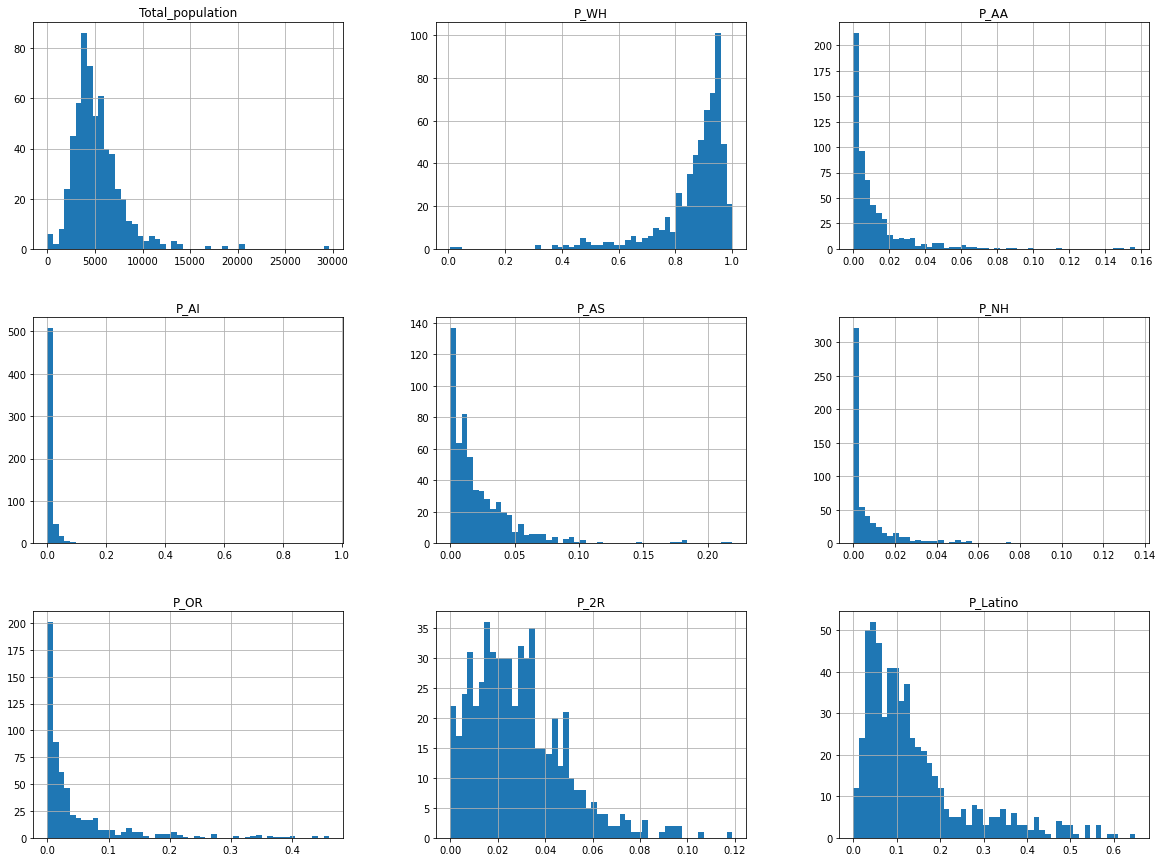

In [41]:
df_2018.iloc[:,:10].hist(bins = 50, figsize = (20, 15)) # Display histograms for the first 10 columns of the combined dataset

In [42]:
# Display the descriptive statistics for the 2nd 10 columns of the dataset
display(df_2018.describe().iloc[:,9:18])

,P_native,P_FB,P_citizen,P_non-citizen,P_NoSchool,P_HS_no_degree,P_HS_or_GED,P_some_college,P_college_degree
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000
mean,0.914214,0.085786,0.951838,0.048162,0.043501,0.046101,0.242013,0.297617,0.274484
std,0.071184,0.071184,0.045217,0.045217,0.037399,0.041607,0.092118,0.080091,0.086630
min,0.583544,0.000000,0.755556,0.000000,0.000000,0.000000,0.028889,0.037383,0.000000
25%,0.890412,0.037037,0.934480,0.015818,0.019067,0.017262,0.169756,0.255993,0.208964
50%,0.934677,0.065323,0.966750,0.033250,0.033578,0.036474,0.240109,0.290679,0.275069
75%,0.962963,0.109588,0.984182,0.065520,0.054282,0.064200,0.314364,0.328125,0.340378
max,1.000000,0.416456,1.000000,0.244444,0.263629,0.523364,0.484282,0.879800,0.492138


array([[<AxesSubplot:title={'center':'P_native'}>,
        <AxesSubplot:title={'center':'P_FB'}>,
        <AxesSubplot:title={'center':'P_citizen'}>],
       [<AxesSubplot:title={'center':'P_non-citizen'}>,
        <AxesSubplot:title={'center':'P_NoSchool'}>,
        <AxesSubplot:title={'center':'P_HS_no_degree'}>],
       [<AxesSubplot:title={'center':'P_HS_or_GED'}>,
        <AxesSubplot:title={'center':'P_some_college'}>,
        <AxesSubplot:title={'center':'P_college_degree'}>]], dtype=object)

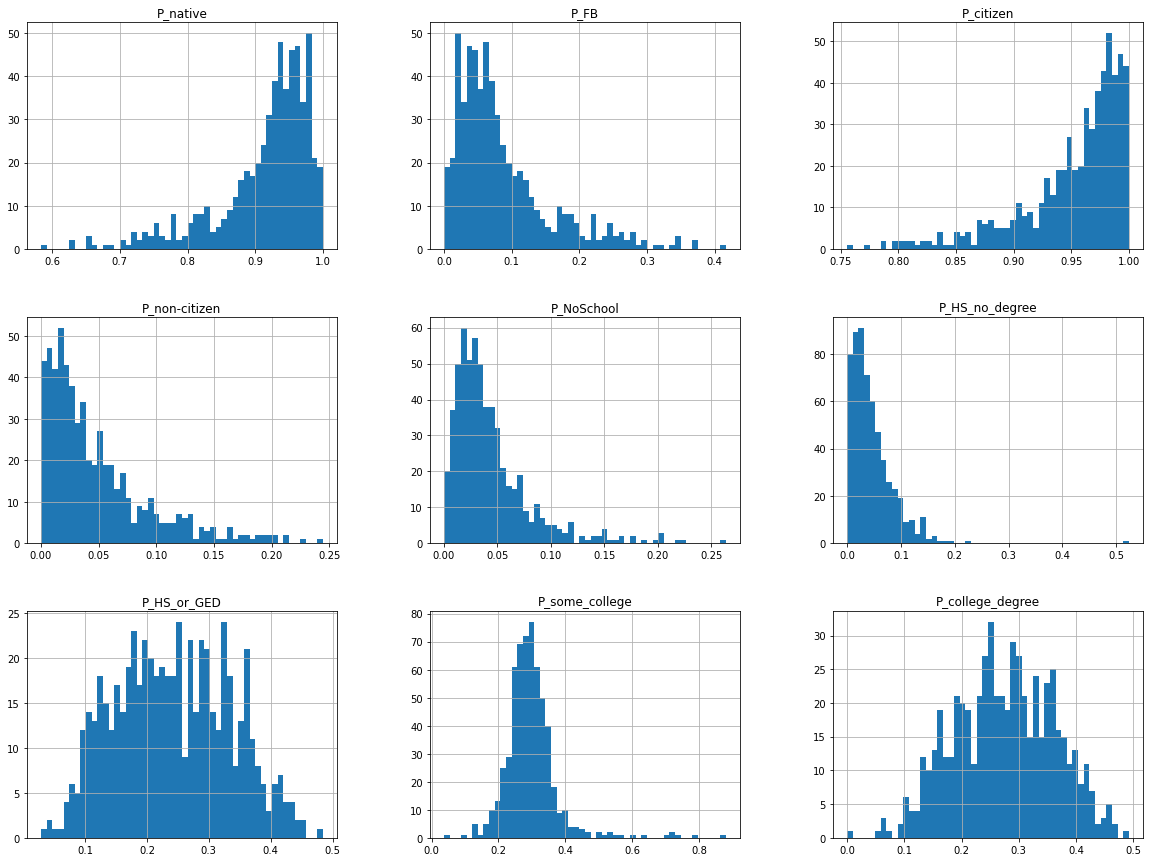

In [43]:
df_2018.iloc[:,10:19].hist(bins = 50, figsize = (20, 15)) # Display histograms for the first 20 columns of the combined dataset

In [44]:
# Display the descriptive statistics for the 3rd 10 columns of the dataset
display(df_2018.describe().iloc[:,18:27])

,P_Masters_prof_doc,P_limited_eng,Poverty_rate,MED_HH_income,UE_rate,P_UI,P_Insured,P_UI_under_18,P_UI_18-64
count,585.000000,585.000000,584.000000,584.000000,584.000000,584.000000,584.000000,583.000000,584.000000
mean,0.096284,0.082586,0.104697,71435.868151,0.040070,0.103089,0.896911,0.078302,0.133683
std,0.070318,0.066283,0.095222,25482.723491,0.024768,0.069795,0.069795,0.073348,0.087881
min,0.000000,0.000000,0.000000,20085.000000,0.000000,0.002000,0.600000,0.000000,0.002000
25%,0.043578,0.036194,0.041136,53100.750000,0.024000,0.051000,0.860750,0.028000,0.068750
50%,0.077939,0.064792,0.079363,67052.000000,0.036000,0.085500,0.914500,0.058000,0.115000
75%,0.130108,0.106734,0.130164,86953.250000,0.051000,0.139250,0.949000,0.108000,0.176000
max,0.409076,0.390323,0.793033,203194.000000,0.233000,0.400000,0.998000,0.690000,0.595000


array([[<AxesSubplot:title={'center':'P_Masters_prof_doc'}>,
        <AxesSubplot:title={'center':'P_limited_eng'}>,
        <AxesSubplot:title={'center':'Poverty_rate'}>],
       [<AxesSubplot:title={'center':'MED_HH_income'}>,
        <AxesSubplot:title={'center':'UE_rate'}>,
        <AxesSubplot:title={'center':'P_UI'}>],
       [<AxesSubplot:title={'center':'P_Insured'}>,
        <AxesSubplot:title={'center':'P_UI_under_18'}>,
        <AxesSubplot:title={'center':'P_UI_18-64'}>]], dtype=object)

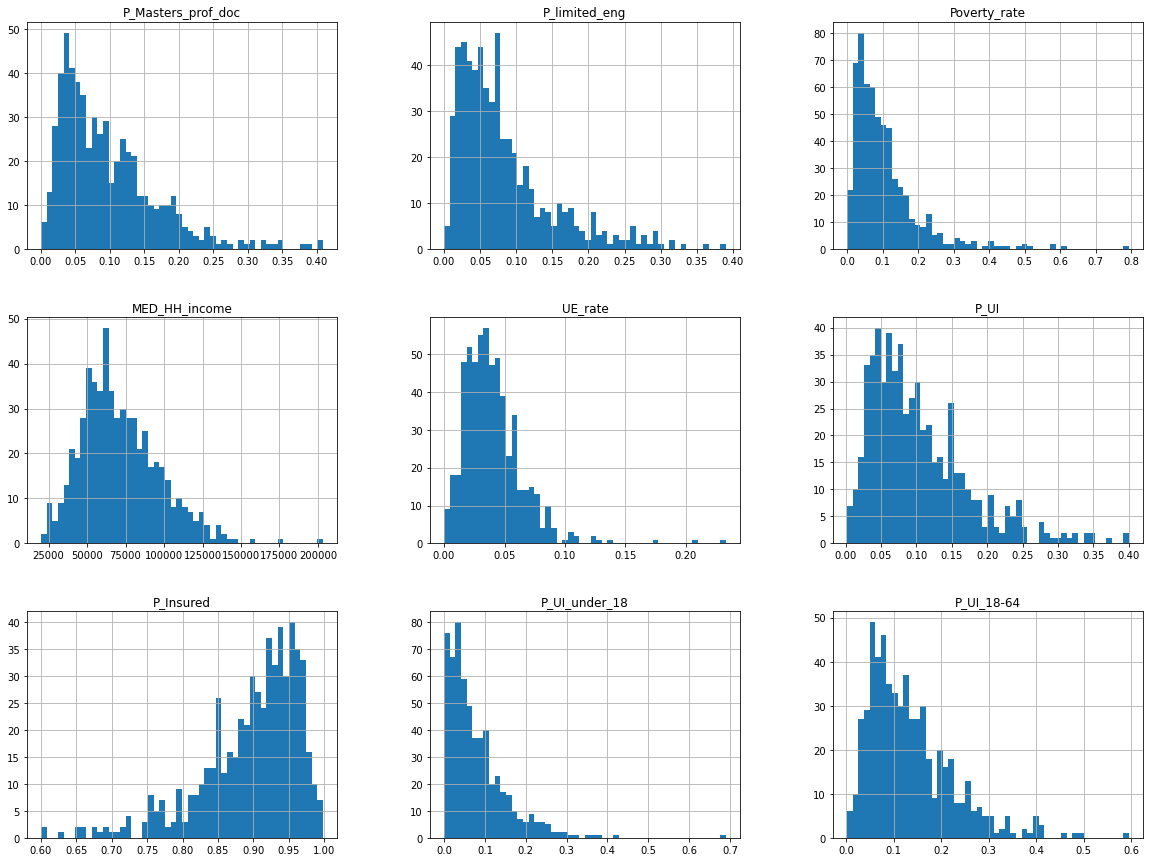

In [45]:
 # Display histograms for the first 20 columns of the combined dataset
df_2018.iloc[:,19:28].hist(bins = 50, figsize = (20, 15))

In [46]:
# Display the descriptive statistics for the 2nd 10 columns of the dataset
display(df_2018.describe().iloc[:,27:40])

,P_UI_65_over,P_any_private_ins,P_any_public_ins,P_Medicare_alone,P_Medicaid_alone,Respiratory HI,NatWalkInd,SVI_themes_total,SVI_flags
count,582.000000,584.000000,584.000000,584.000000,584.000000,585.000000,588.000000,584.000000,584.000000
mean,0.012139,0.770139,0.219002,0.120113,0.110594,0.267683,10.950274,0.499994,1.493151
std,0.033115,0.123197,0.081450,0.057119,0.067545,0.086927,3.635430,0.289419,2.011107
min,0.000000,0.228000,0.019000,0.002000,0.006000,0.092095,1.000000,0.000000,0.000000
25%,0.000000,0.700500,0.163000,0.080750,0.060750,0.213989,7.833333,0.249975,0.000000
50%,0.000000,0.797000,0.211000,0.115000,0.098000,0.267552,11.333333,0.500000,1.000000
75%,0.000750,0.862250,0.266000,0.154000,0.147000,0.319366,13.958333,0.750025,2.000000
max,0.339000,0.983000,0.521000,0.451000,0.426000,0.745067,19.000000,1.000000,11.000000


array([[<AxesSubplot:title={'center':'P_UI_65_over'}>,
        <AxesSubplot:title={'center':'P_any_private_ins'}>,
        <AxesSubplot:title={'center':'P_any_public_ins'}>],
       [<AxesSubplot:title={'center':'P_Medicare_alone'}>,
        <AxesSubplot:title={'center':'P_Medicaid_alone'}>,
        <AxesSubplot:title={'center':'Respiratory HI'}>],
       [<AxesSubplot:title={'center':'NatWalkInd'}>,
        <AxesSubplot:title={'center':'SVI_themes_total'}>,
        <AxesSubplot:title={'center':'SVI_flags'}>]], dtype=object)

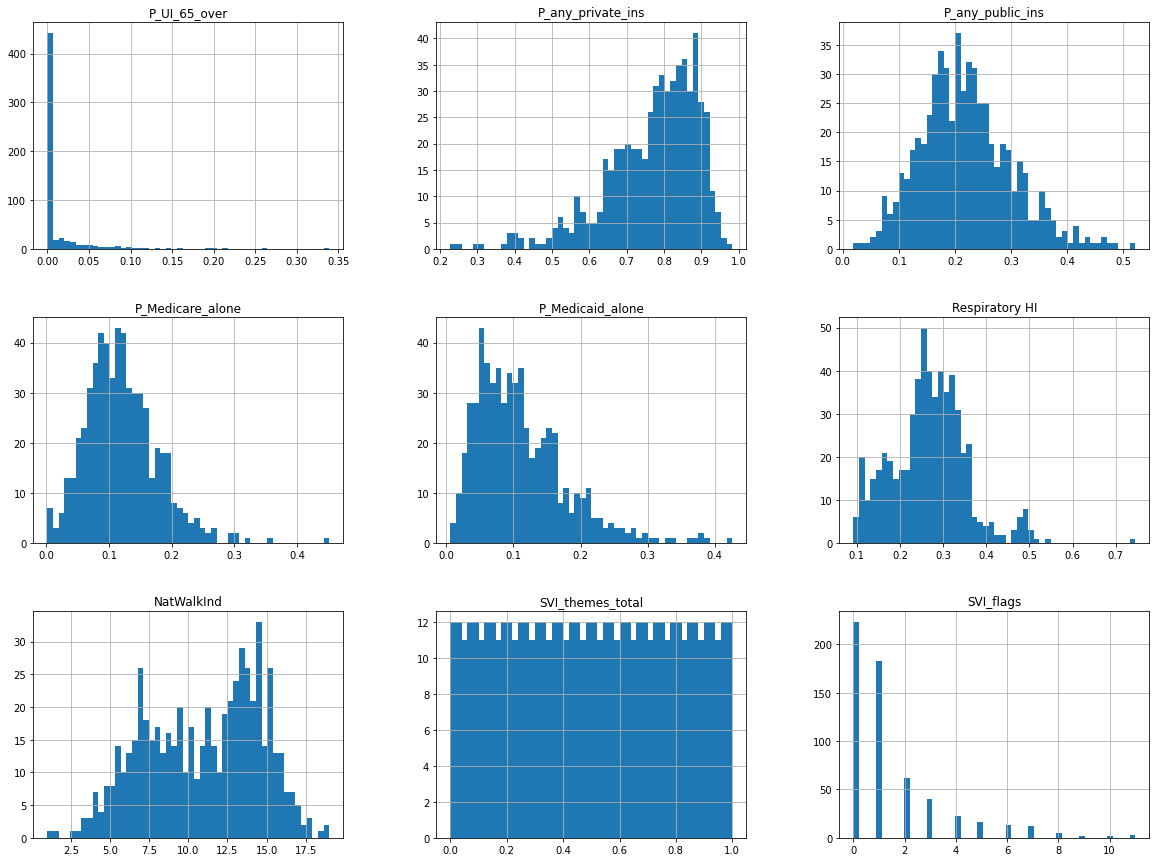

In [47]:
 # Display histograms for the first 20 columns of the combined dataset
df_2018.iloc[:,28:40].hist(bins = 50, figsize = (20, 15))

__Interpretation:__ The data descriptions and histograms were reviewed looking for any data that seemed out of place. The data was found to be acceptable.

In [48]:
print('Number of items missing in each column')
df_2018.isna().sum()

Number of items missing in each column


FIPS                  0
Total_population      0
P_WH                  3
P_AA                  3
P_AI                  3
P_AS                  3
P_NH                  3
P_OR                  3
P_2R                  3
P_Latino              3
P_native              3
P_FB                  3
P_citizen             3
P_non-citizen         3
P_NoSchool            3
P_HS_no_degree        3
P_HS_or_GED           3
P_some_college        3
P_college_degree      3
P_Masters_prof_doc    3
P_limited_eng         3
Poverty_rate          4
MED_HH_income         4
UE_rate               4
P_UI                  4
P_Insured             4
P_UI_under_18         5
P_UI_18-64            4
P_UI_65_over          6
P_any_private_ins     4
P_any_public_ins      4
P_Medicare_alone      4
P_Medicaid_alone      4
Respiratory HI        3
NatWalkInd            0
SVI_themes_total      4
SVI_flags             4
dtype: int64

___
<a id='data_exp_2019'></a>
#### 2019 Data Exploration

In [49]:
# Display the descriptive statistics for the first 10 column of the dataset
display(df_2019.describe().iloc[:,:9])

,Urban,Total_population,P_WH,P_AA,P_AI,P_AS,P_NH,P_OR,P_2R
count,585.000000,588.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000
mean,0.851282,5266.748299,0.864496,0.012305,0.012530,0.023161,0.008563,0.049251,0.029694
std,0.356115,2826.773219,0.126908,0.020386,0.059645,0.027416,0.016476,0.078404,0.020182
min,0.000000,0.000000,0.008952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3617.750000,0.838642,0.001072,0.000000,0.004561,0.000000,0.005866,0.014347
50%,1.000000,4721.000000,0.904860,0.005556,0.003415,0.013959,0.001730,0.018130,0.026172
75%,1.000000,6363.500000,0.940217,0.013546,0.010558,0.032171,0.010012,0.056191,0.041355
max,1.000000,31161.000000,1.000000,0.209565,0.966616,0.201830,0.150274,0.585322,0.107503


array([[<AxesSubplot:title={'center':'Urban'}>,
        <AxesSubplot:title={'center':'Total_population'}>,
        <AxesSubplot:title={'center':'P_WH'}>],
       [<AxesSubplot:title={'center':'P_AA'}>,
        <AxesSubplot:title={'center':'P_AI'}>,
        <AxesSubplot:title={'center':'P_AS'}>],
       [<AxesSubplot:title={'center':'P_NH'}>,
        <AxesSubplot:title={'center':'P_OR'}>,
        <AxesSubplot:title={'center':'P_2R'}>]], dtype=object)

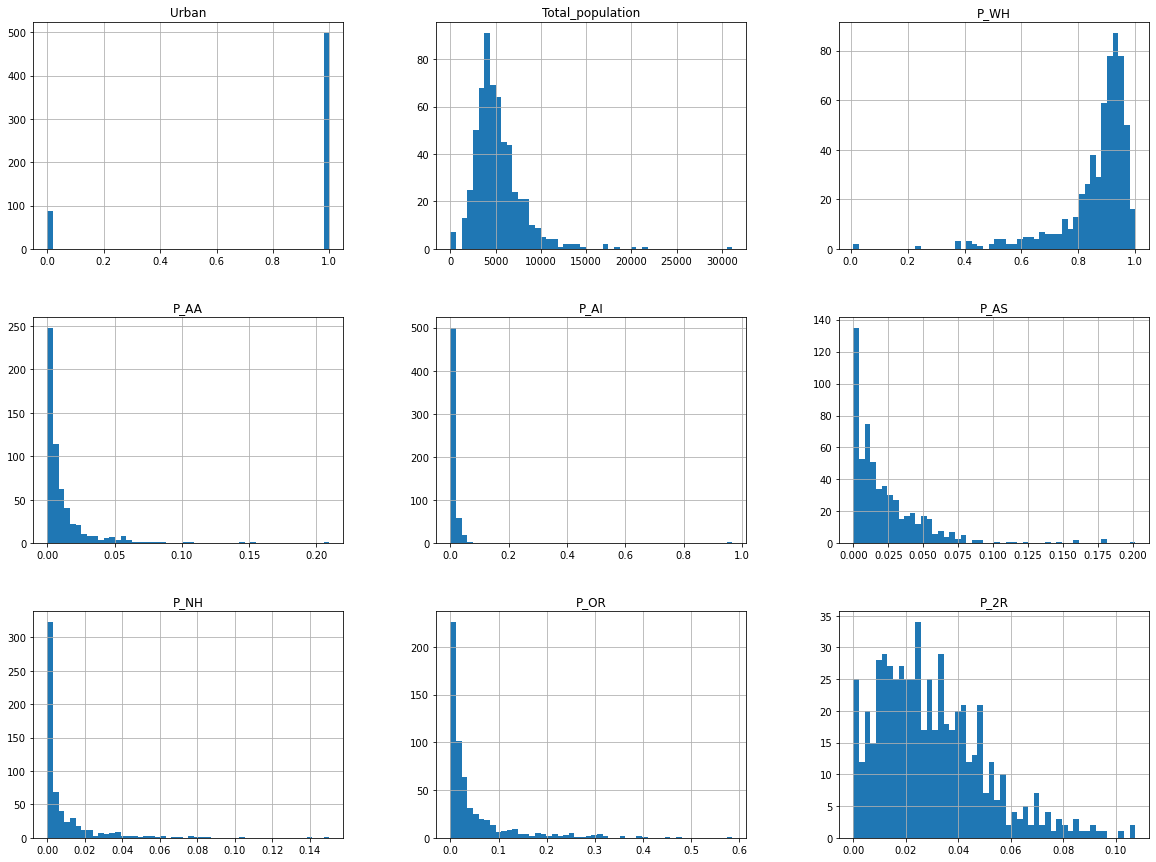

In [50]:
df_2019.iloc[:,:10].hist(bins = 50, figsize = (20, 15)) # Display histograms for the first 9 columns of the combined dataset

In [51]:
# Display the descriptive statistics for the second 9 column of the dataset
display(df_2019.describe().iloc[:,9:18])

,P_Latino,P_native,P_FB,P_citizen,P_non-citizen,P_NoSchool,P_HS_no_degree,P_HS_or_GED,P_some_college
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000
mean,0.140637,0.913393,0.086607,0.952151,0.047849,0.041816,0.044436,0.242736,0.293753
std,0.120384,0.071495,0.071495,0.044801,0.044801,0.036014,0.038673,0.092123,0.080536
min,0.000000,0.545035,0.000000,0.722737,0.000000,0.000000,0.000000,0.037548,0.045161
25%,0.056891,0.887835,0.035995,0.935012,0.016050,0.018857,0.017540,0.166997,0.253300
50%,0.104215,0.933159,0.066841,0.965735,0.034265,0.031760,0.036712,0.239480,0.289956
75%,0.174591,0.964005,0.112165,0.983950,0.064988,0.052228,0.060493,0.316393,0.320534
max,0.658455,1.000000,0.454965,1.000000,0.277263,0.258014,0.445161,0.479655,0.857085


array([[<AxesSubplot:title={'center':'P_Latino'}>,
        <AxesSubplot:title={'center':'P_native'}>,
        <AxesSubplot:title={'center':'P_FB'}>],
       [<AxesSubplot:title={'center':'P_citizen'}>,
        <AxesSubplot:title={'center':'P_non-citizen'}>,
        <AxesSubplot:title={'center':'P_NoSchool'}>],
       [<AxesSubplot:title={'center':'P_HS_no_degree'}>,
        <AxesSubplot:title={'center':'P_HS_or_GED'}>,
        <AxesSubplot:title={'center':'P_some_college'}>]], dtype=object)

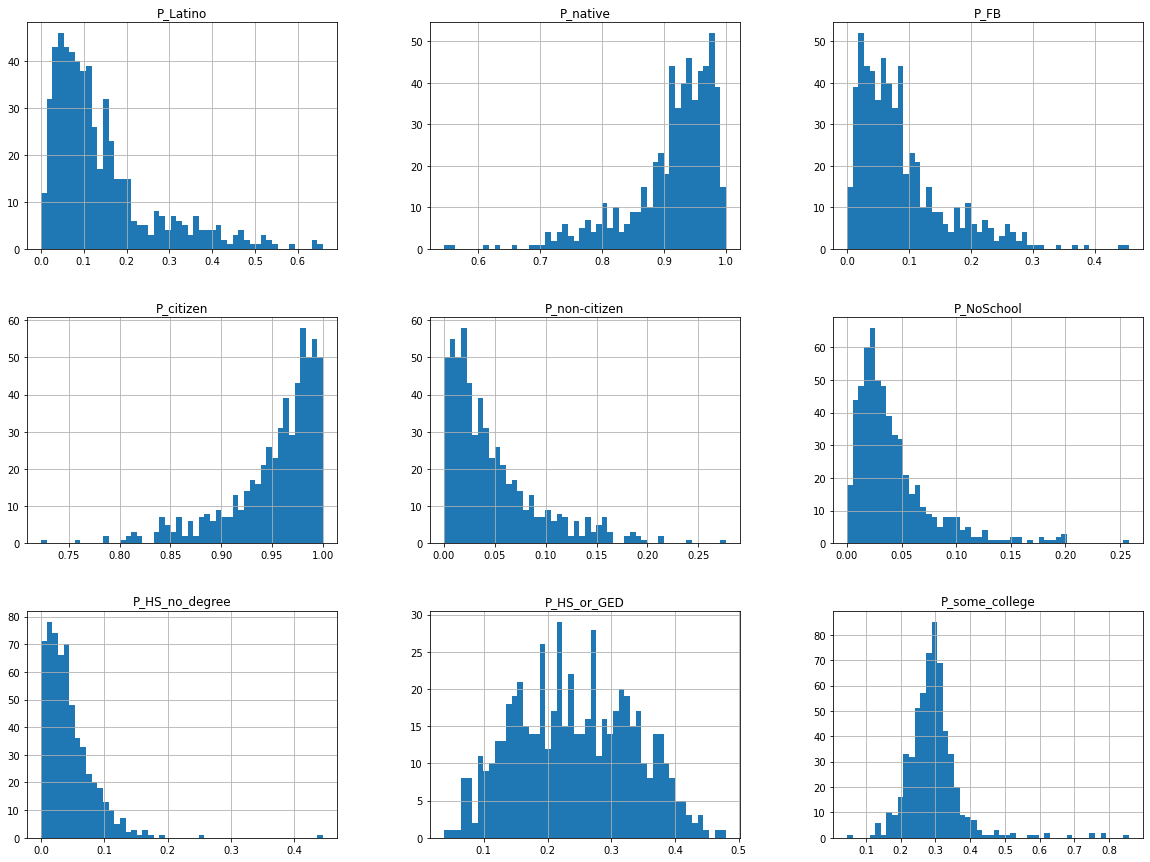

In [52]:
 # Display histograms for the second 9 columns of the combined dataset
df_2019.iloc[:,10:19].hist(bins = 50, figsize = (20, 15))

In [53]:
# Display the descriptive statistics for the third 9 column of the dataset
display(df_2019.describe().iloc[:,18:27])

,P_college_degree,P_Masters_prof_doc,P_limited_eng,Poverty_rate,MED_HH_income,UE_rate,P_UI,P_Insured,P_UI_under_18
count,585.000000,585.000000,585.000000,584.000000,584.000000,584.000000,584.000000,584.000000,583.000000
mean,0.278879,0.098380,0.083678,0.098911,74534.330479,0.036688,0.097091,0.902909,0.075959
std,0.085578,0.071256,0.067250,0.091867,26170.969525,0.022900,0.067089,0.067089,0.070086
min,0.049096,0.000000,0.000000,0.000000,20588.000000,0.000000,0.003000,0.602000,0.000000
25%,0.214998,0.044662,0.035432,0.041044,55717.000000,0.021000,0.047000,0.871000,0.026000
50%,0.280061,0.080880,0.064278,0.073892,70244.000000,0.033000,0.080500,0.919500,0.056000
75%,0.343380,0.134127,0.109789,0.123149,90569.250000,0.048000,0.129000,0.953000,0.107000
max,0.482273,0.408469,0.420917,0.770000,210789.000000,0.253000,0.398000,0.997000,0.448000


array([[<AxesSubplot:title={'center':'P_college_degree'}>,
        <AxesSubplot:title={'center':'P_Masters_prof_doc'}>,
        <AxesSubplot:title={'center':'P_limited_eng'}>],
       [<AxesSubplot:title={'center':'Poverty_rate'}>,
        <AxesSubplot:title={'center':'MED_HH_income'}>,
        <AxesSubplot:title={'center':'UE_rate'}>],
       [<AxesSubplot:title={'center':'P_UI'}>,
        <AxesSubplot:title={'center':'P_Insured'}>,
        <AxesSubplot:title={'center':'P_UI_under_18'}>]], dtype=object)

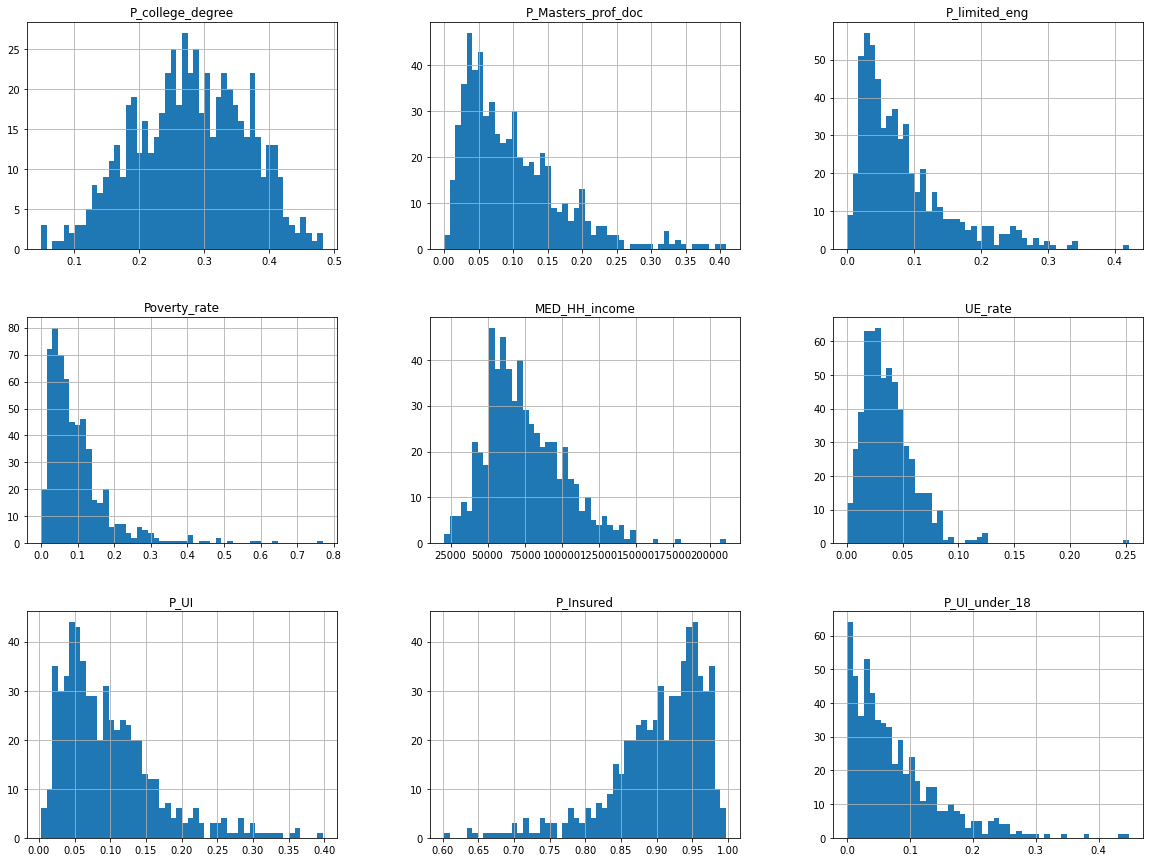

In [54]:
 # Display histograms for the third 9 columns of the combined dataset
df_2019.iloc[:,19:28].hist(bins = 50, figsize = (20, 15))

In [55]:
# Display the descriptive statistics for the fourth 9 column of the dataset
display(df_2019.describe().iloc[:,27:40])

,P_UI_18-64,P_UI_65_over,P_any_private_ins,P_any_public_ins,P_Medicare_alone,P_Medicaid_alone,Respiratory HI,Low_access
count,584.000000,582.000000,584.000000,584.000000,584.000000,584.000000,585.000000,585.000000
mean,0.124973,0.011732,0.775878,0.220142,0.122830,0.109425,0.224188,0.794872
std,0.083668,0.031223,0.118404,0.080215,0.057437,0.065933,0.082225,0.404141
min,0.005000,0.000000,0.232000,0.024000,0.002000,0.000000,0.080000,0.000000
25%,0.062000,0.000000,0.711750,0.166000,0.083000,0.061000,0.200000,1.000000
50%,0.106000,0.000000,0.802000,0.212000,0.116000,0.095000,0.200000,1.000000
75%,0.168000,0.002000,0.868250,0.270000,0.156000,0.143000,0.300000,1.000000
max,0.511000,0.271000,0.973000,0.545000,0.472000,0.418000,0.900000,1.000000


array([[<AxesSubplot:title={'center':'P_UI_18-64'}>,
        <AxesSubplot:title={'center':'P_UI_65_over'}>,
        <AxesSubplot:title={'center':'P_any_private_ins'}>],
       [<AxesSubplot:title={'center':'P_any_public_ins'}>,
        <AxesSubplot:title={'center':'P_Medicare_alone'}>,
        <AxesSubplot:title={'center':'P_Medicaid_alone'}>],
       [<AxesSubplot:title={'center':'Respiratory HI'}>,
        <AxesSubplot:title={'center':'Low_access'}>, <AxesSubplot:>]],
      dtype=object)

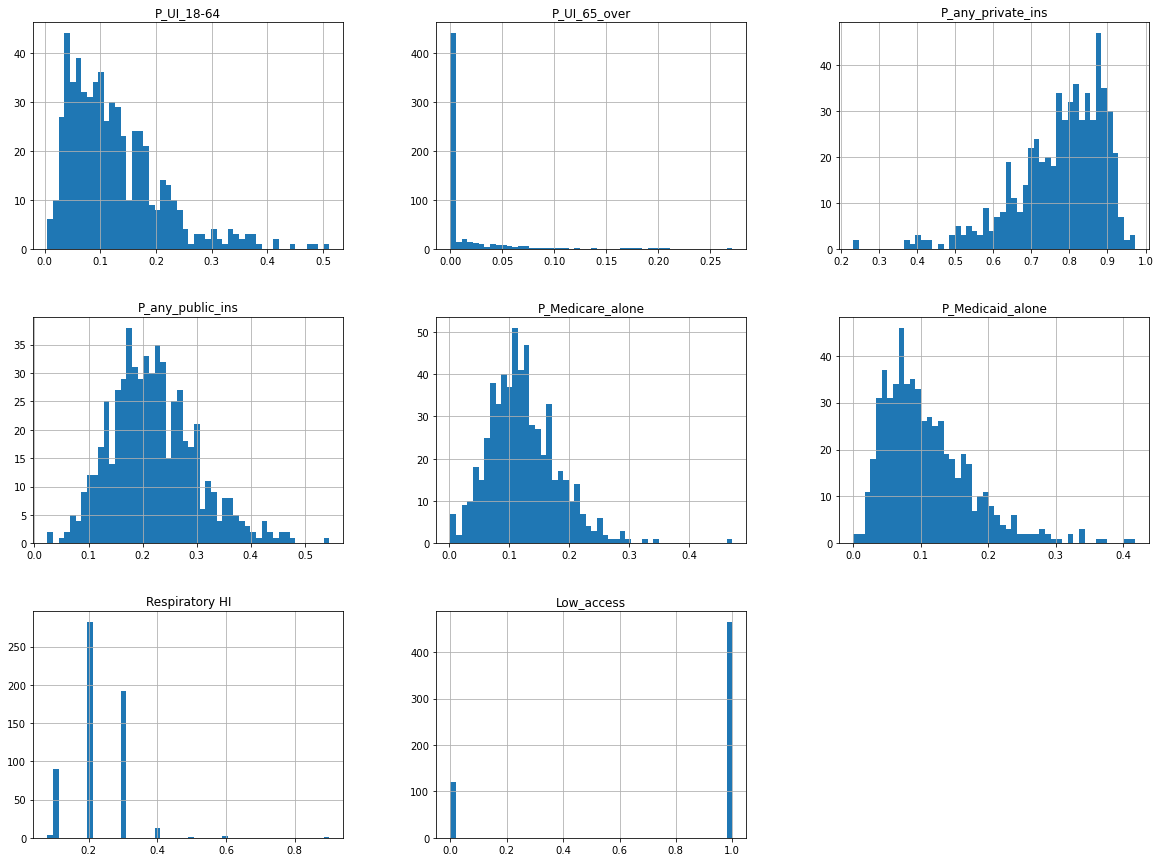

In [56]:
df_2019.iloc[:,28:40].hist(bins = 50, figsize = (20, 15)) # Display histograms for the fourth 9 columns of the combined dataset

__Interpretation:__ The data descriptions and histograms were reviewed looking for any data that seemed out of place. The data was found to be acceptable.

In [57]:
print('Number of items missing in each column')
df_2019.isna().sum()

Number of items missing in each column


FIPS                  0
Urban                 3
Total_population      0
P_WH                  3
P_AA                  3
P_AI                  3
P_AS                  3
P_NH                  3
P_OR                  3
P_2R                  3
P_Latino              3
P_native              3
P_FB                  3
P_citizen             3
P_non-citizen         3
P_NoSchool            3
P_HS_no_degree        3
P_HS_or_GED           3
P_some_college        3
P_college_degree      3
P_Masters_prof_doc    3
P_limited_eng         3
Poverty_rate          4
MED_HH_income         4
UE_rate               4
P_UI                  4
P_Insured             4
P_UI_under_18         5
P_UI_18-64            4
P_UI_65_over          6
P_any_private_ins     4
P_any_public_ins      4
P_Medicare_alone      4
P_Medicaid_alone      4
Respiratory HI        3
Low_access            3
dtype: int64

___
<a id='data_comp'></a>
### Data Comparison
<a id='data_boxplot'></a>
#### Boxplots

C:\Users\Jonathan\anaconda3\envs\EZEKIEL\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


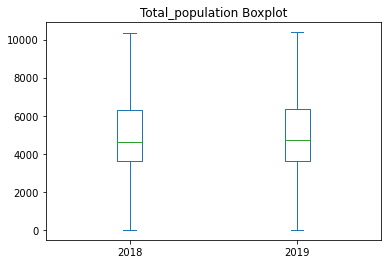

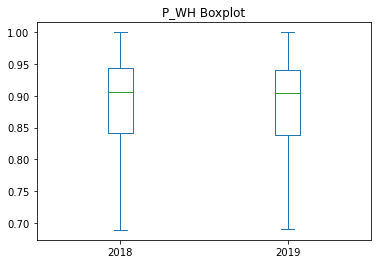

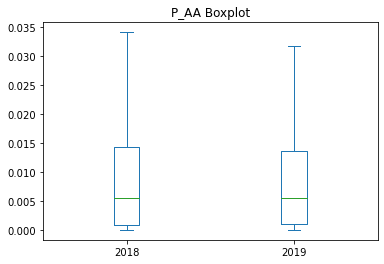

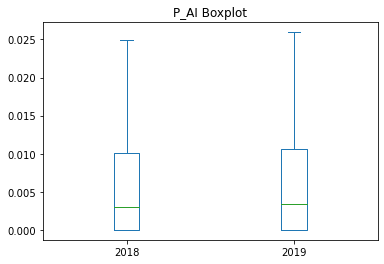

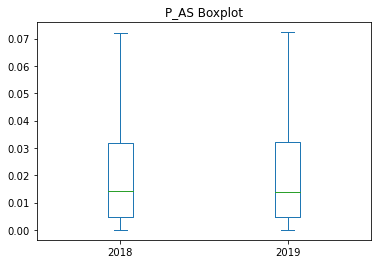

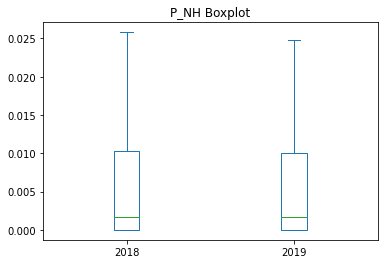

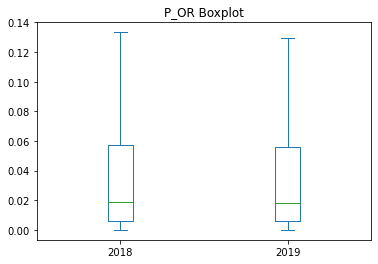

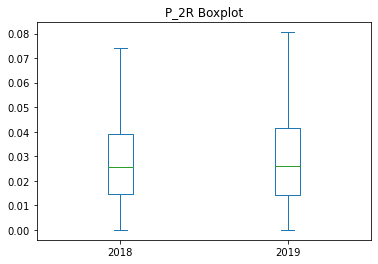

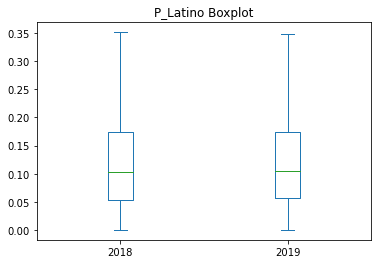

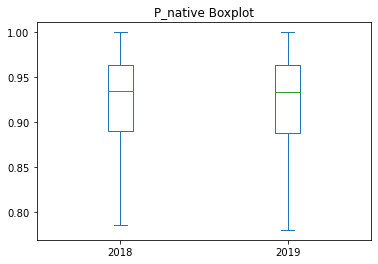

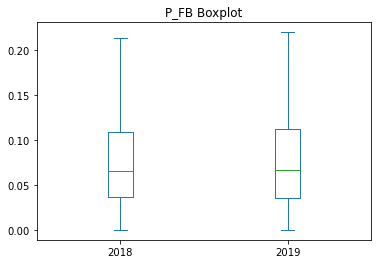

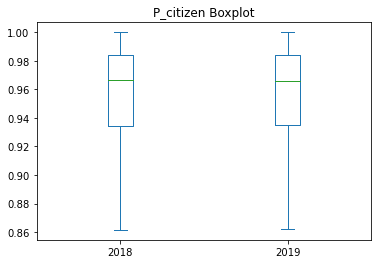

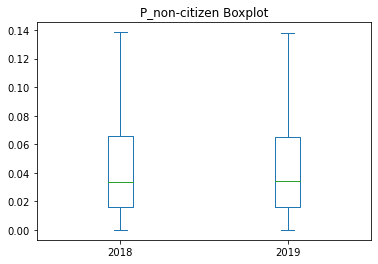

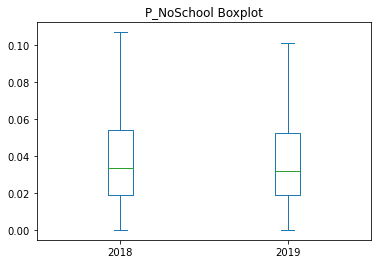

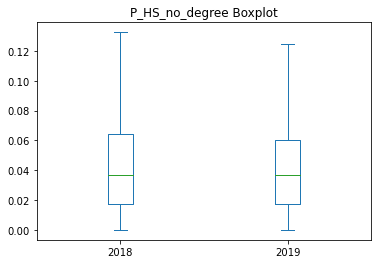

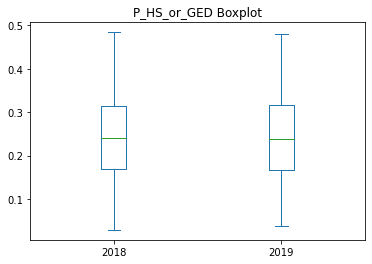

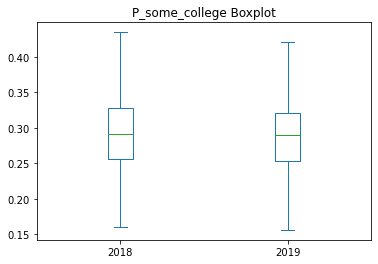

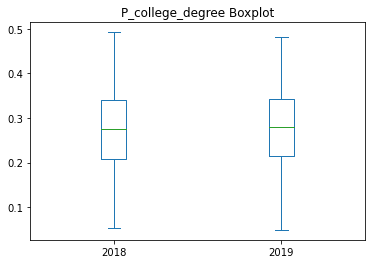

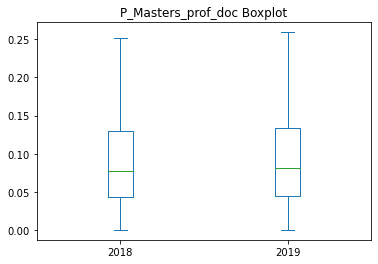

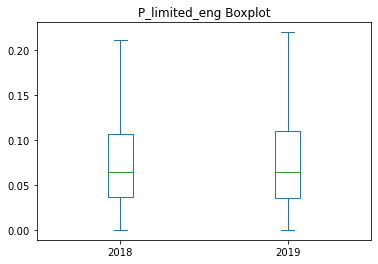

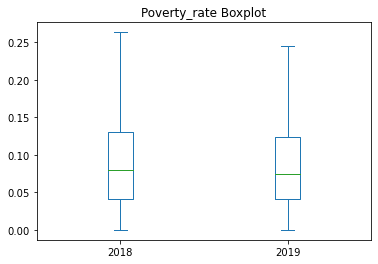

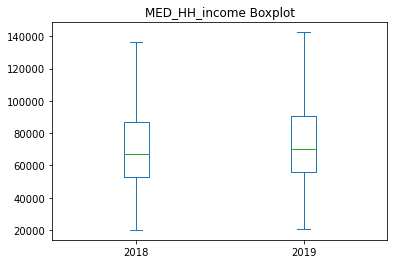

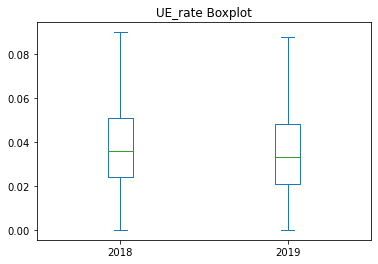

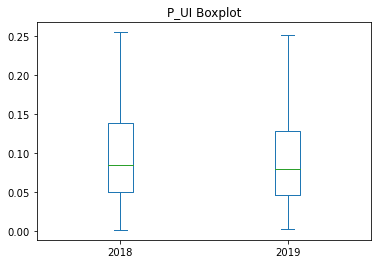

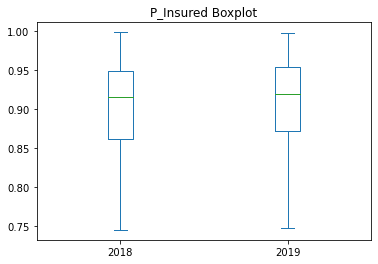

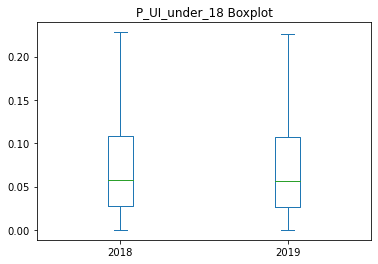

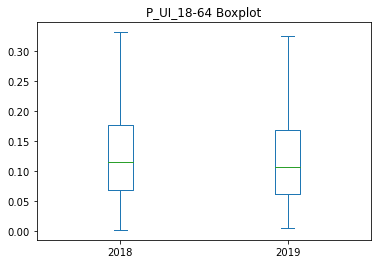

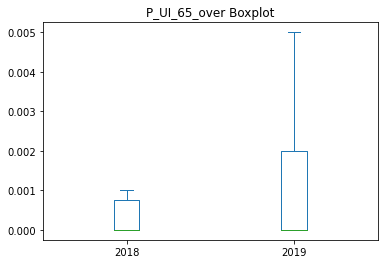

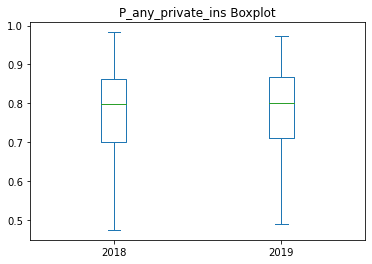

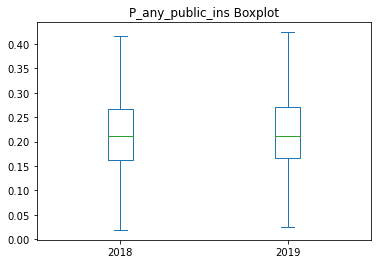

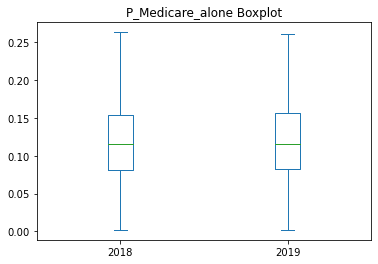

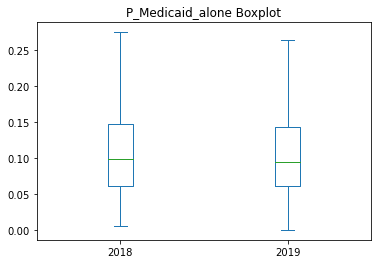

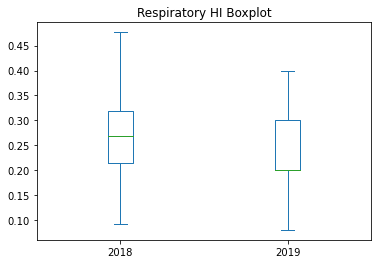

In [58]:
# Print boxplot comparison of each column for easy viewing
common_columns = [x for x in list(df_2018.columns) if x in list(df_2019.columns)]
common_columns.remove('FIPS')

for i in common_columns:
    bp_data = pd.DataFrame({"2018": df_2018[i], "2019": df_2019[i]})
    plt = bp_data[["2018", "2019"]].plot(kind='box', title='boxplot', showfliers=False)
    plt.set_title(f'{i} Boxplot')


    

__Interpretation:__ It's hard to get a sense if there is much difference in the median. We will look at the unpaired t-test p-value to see if the medians are statistically different. First we will have to make sure that the data is normally distributed.

<a id='data_stat'></a>
#### Statistical Tests

In [59]:
# Check that all columns are normally distributed with the shapiro test
shapiro_pvalues_2018 = []
shapiro_pvalues_2019 = []
for i in common_columns:
    stat, p = stats.shapiro(df_2018[i].dropna())
    shapiro_pvalues_2018.append(p)
    stat, p = stats.shapiro(df_2019[i].dropna())
    shapiro_pvalues_2019.append(p)    

In [60]:
shapiro_df = pd.DataFrame(list(zip(common_columns,shapiro_pvalues_2018,shapiro_pvalues_2019)), columns = ['Columns', 'P-value 2018', 'P-value 2019'])
shapiro_df

,Columns,P-value 2018,P-value 2019
0,Total_population,1.386354e-24,3.341324e-25
1,P_WH,2.183076e-29,3.130556e-29
2,P_AA,1.182229e-34,8.796104e-35
3,P_AI,2.802597e-45,4.203895e-45
4,P_AS,2.172921e-30,3.799630e-29
5,P_NH,9.484302e-36,9.764664e-36
6,P_OR,9.071404e-34,1.225077e-33
7,P_2R,3.846831e-15,2.094563e-14
8,P_Latino,9.424301e-25,3.347160e-24
9,P_native,2.200842e-23,4.377811e-23


__Interpretation:__ Based on the histograms generated earlier and the fact that the p values from the shapiro test is less than .05 for all of our columns, we are going to assume that the columns are normally distributed and that a parametric test can be used.

In [61]:
# Calculated the p values for the umpaired t test from 2018 and 2019
unpaired_t_test_pvalues = []
for i in common_columns:
    stat, p = stats.ttest_ind(df_2018[i].dropna(),df_2019[i].dropna(), equal_var=False)
    unpaired_t_test_pvalues.append(p)


In [62]:
unpaired_t_test_df = pd.DataFrame(list(zip(common_columns,unpaired_t_test_pvalues)), columns = ['Columns', 'Unpaired t-test P-value'])
unpaired_t_test_df

,Columns,Unpaired t-test P-value
0,Total_population,5.871462e-01
1,P_WH,8.714862e-01
2,P_AA,7.557776e-01
3,P_AI,9.256765e-01
4,P_AS,7.577112e-01
5,P_NH,8.594648e-01
6,P_OR,8.559612e-01
7,P_2R,3.689919e-01
8,P_Latino,7.737409e-01
9,P_native,8.440525e-01


In [65]:
# View comparisons where unpaired t test p value are less than .05
unpaired_t_test_df[unpaired_t_test_df['Unpaired t-test P-value'] < .05]

,Columns,Unpaired t-test P-value
21,MED_HH_income,4.059991e-02
22,UE_rate,1.555521e-02
32,Respiratory HI,5.185506e-18


__Interpretation:__ The only statistically signicant differences from 2018 to 2019 SDOHs were:
- UE_rate - unemployment rate
- MED_HH_income - median household income
- Respiratory HI - Resperatory Hazard Index

Text(0.5, 1.0, 'UE_rate Boxplot')

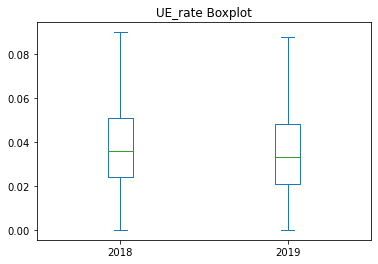

In [63]:
bp_data = pd.DataFrame({"2018": df_2018['UE_rate'], "2019": df_2019['UE_rate']})
ax = bp_data[["2018", "2019"]].plot(kind='box', title='boxplot', showfliers=False)
ax.set_title('UE_rate Boxplot')

Text(0.5, 1.0, 'MED_HH_income Boxplot')

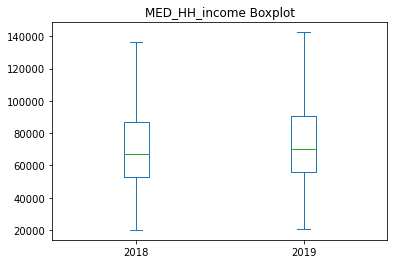

In [64]:
bp_data = pd.DataFrame({"2018": df_2018['MED_HH_income'], "2019": df_2019['MED_HH_income']})
ax = bp_data[["2018", "2019"]].plot(kind='box', title='boxplot', showfliers=False)
ax.set_title('MED_HH_income Boxplot')